In [4]:
!pip install explainableai
import os
os.environ['GOOGLE_API_KEY'] = 'API_KEY'

c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear

Logistic Regression (saga) Best Parameters: {'logistic_regression__C': 1, 'logistic_regression__l1_ratio': 0.1, 'logistic_regression__max_iter': 5000, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'saga'}
Logistic Regression (saga) Test Accuracy: 97.37%
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
Random Forest Test Accuracy: 96.49%
XGBoost Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
XGBoost Test Accuracy: 97.37%
Neural Network (MLP) Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 3000, 'solver': 'adam'}
Neural Network (MLP) Test Accuracy: 95.61%


2024-10-07 11:05:05,854 - explainableai.llm_explanations - DEBUG - Initializing gemini...
2024-10-07 11:05:05,854 - explainableai.llm_explanations - INFO - Gemini initialize successfully...
2024-10-07 11:05:05,859 - explainableai.core - DEBUG - Fitting the model...
2024-10-07 11:05:05,859 - explainableai.core - INFO - Preprocessing data...
2024-10-07 11:05:05,872 - explainableai.core - DEBUG - Creating Preprocessing Steps...
2024-10-07 11:05:05,873 - explainableai.core - INFO - Pre proccessing completed...
2024-10-07 11:05:05,873 - explainableai.core - DEBUG - Fitting and transforming the data...
2024-10-07 11:05:05,880 - explainableai.core - DEBUG - Updating feature names...
2024-10-07 11:05:05,881 - explainableai.core - INFO - Fitting models and analyzing...
2024-10-07 11:05:05,881 - explainableai.core - DEBUG - Comparing the models...
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter 

{'model_performance': {'accuracy': 1.0, 'f1_score': np.float64(1.0), 'confusion_matrix': array([[169,   0],
       [  0, 286]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       169\n           1       1.00      1.00      1.00       286\n\n    accuracy                           1.00       455\n   macro avg       1.00      1.00      1.00       455\nweighted avg       1.00      1.00      1.00       455\n'}, 'feature_importance': {'worst symmetry': np.float64(0.05450549450549454), 'radius error': np.float64(0.04131868131868129), 'worst texture': np.float64(0.04021978021978021), 'mean concave points': np.float64(0.0389010989010989), 'area error': np.float64(0.027252747252747254), 'worst concavity': np.float64(0.02505494505494508), 'mean concavity': np.float64(0.022637362637362646), 'worst concave points': np.float64(0.01868131868131868), 'mean compactness': np.float64(0.014065934065934049), 'compactness err

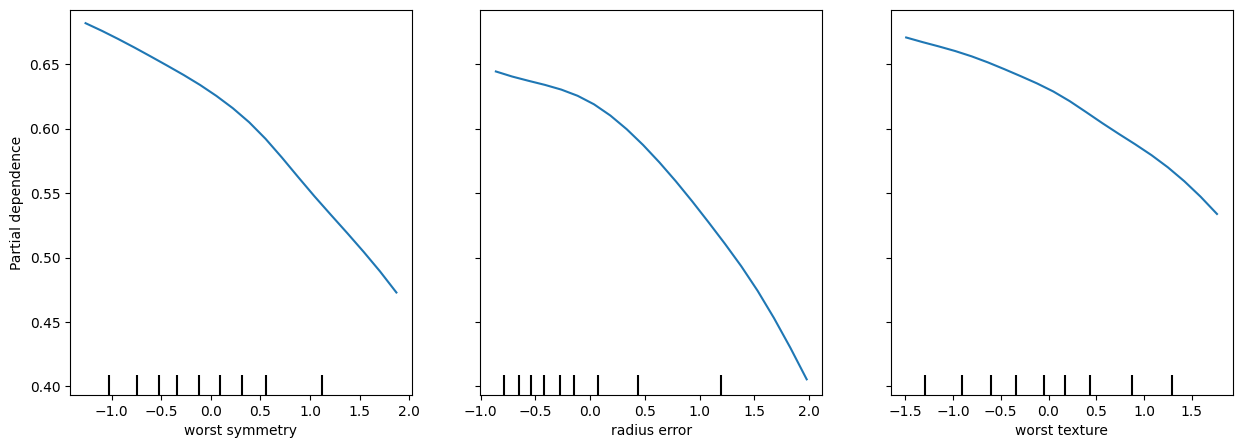

In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Set the Google API key as an environment variable (if required)
os.environ['GOOGLE_API_KEY'] = 'YOUR_API_KEY'

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train, columns=data.feature_names)
X_test = pd.DataFrame(X_test, columns=data.feature_names)


# Feature scaling
scaler = StandardScaler()

# Logistic Regression with 'saga' solver and hyperparameter tuning
logistic_regression_params = {
    'logistic_regression__C': [0.01, 0.1, 1, 10],
    'logistic_regression__penalty': ['l2', 'elasticnet'],
    'logistic_regression__l1_ratio': [0.1, 0.5, 0.9],
    'logistic_regression__solver': ['saga'],
    'logistic_regression__max_iter': [5000]
}
logistic_regression_pipeline = Pipeline([
    ('scaler', scaler),
    ('logistic_regression', LogisticRegression())
])
logistic_regression_gs = GridSearchCV(logistic_regression_pipeline, logistic_regression_params, cv=5)

# Random Forest with hyperparameter tuning
random_forest_params = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest = RandomForestClassifier(random_state=42)
random_forest_gs = GridSearchCV(random_forest, random_forest_params, cv=5)

# XGBoost with hyperparameter tuning
xgboost_params = {
    'n_estimators': [1000, 2000, 3000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 1.0]
}
xgboost = XGBClassifier(random_state=42, use_label_encoder=False)
xgboost_gs = GridSearchCV(xgboost, xgboost_params, cv=5)

# Neural Network (MLP) with hyperparameter tuning
mlp_params = {
    'hidden_layer_sizes': [(100, 50), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [3000]
}
mlp = MLPClassifier(random_state=42)
mlp_gs = GridSearchCV(mlp, mlp_params, cv=5)

# Fit the models
logistic_regression_gs.fit(X_train, y_train)
random_forest_gs.fit(X_train, y_train)
xgboost_gs.fit(X_train, y_train)
mlp_gs.fit(X_train, y_train)

# Evaluate the models on the test set
logistic_regression_best = logistic_regression_gs.best_estimator_
random_forest_best = random_forest_gs.best_estimator_
xgboost_best = xgboost_gs.best_estimator_
mlp_best = mlp_gs.best_estimator_

# Predictions
y_pred_log_reg = logistic_regression_best.predict(X_test)
y_pred_rf = random_forest_best.predict(X_test)
y_pred_xgb = xgboost_best.predict(X_test)
y_pred_mlp = mlp_best.predict(X_test)

# Accuracy scores
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

# Display the results
print(f"Logistic Regression (saga) Best Parameters: {logistic_regression_gs.best_params_}")
print(f"Logistic Regression (saga) Test Accuracy: {log_reg_acc * 100:.2f}%")

print(f"Random Forest Best Parameters: {random_forest_gs.best_params_}")
print(f"Random Forest Test Accuracy: {rf_acc * 100:.2f}%")

print(f"XGBoost Best Parameters: {xgboost_gs.best_params_}")
print(f"XGBoost Test Accuracy: {xgb_acc * 100:.2f}%")

print(f"Neural Network (MLP) Best Parameters: {mlp_gs.best_params_}")
print(f"Neural Network (MLP) Test Accuracy: {mlp_acc * 100:.2f}%")

# Initialize the XAIWrapper
from explainableai import XAIWrapper  # Ensure to import your XAI wrapper

xai = XAIWrapper()

try:
    # Fit the models and run XAI analysis
    xai.fit({
        'Logistic Regression': logistic_regression_best,
        'Random Forest': random_forest_best,
        'XGBoost': xgboost_best,
        'Neural Network': mlp_best
    }, X_train, y_train)

    # Perform XAI analysis on the fitted models
    results = xai.analyze()
    print(results)  # Display the results of the XAI analysis
except Exception as e:
    print(f"An error occurred during the XAI analysis: {e}")


In [10]:
# Define the models after hyperparameter tuning
models = {
    'Logistic Regression': logistic_regression_best,
    'Random Forest': random_forest_best,
    'XGBoost': xgboost_best,
    'Neural Network (MLP)': mlp_best
}

# Loop through the models, train and evaluate them
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model on the training set
    accuracy = model.score(X_test, y_test)  # Calculate accuracy on the test set
    print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")  # Print the test accuracy


c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Logistic Regression Test Accuracy: 97.37%
Random Forest Test Accuracy: 96.49%


c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 97.37%
Neural Network (MLP) Test Accuracy: 95.61%
